# Imports

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating DF

In [2]:

columns = [
    'id'
    , 'title'
    , 'publishedAt'
    , 'duration'
    , 'viewCount'
    , 'likeCount'
    , 'commentCount'
]
df = pd.DataFrame(columns=columns)

In [6]:
video_array = [
    '..\\video_api_data_full\\full_videos_output_1_50.json'
    , '..\\video_api_data_full\\full_videos_output_51_100.json'
    , '..\\video_api_data_full\\full_videos_output_101_150.json'
    , '..\\video_api_data_full\\full_videos_output_all_long.json'
]
for file_name in video_array:
    #print('Done')
    video_data_file = open(file_name)
    video_data = json.load(video_data_file)
    for item in video_data['items']:
        try:
            df.loc[-1] = [
                item['id']
                , item['snippet']['title']
                , item['snippet']['publishedAt']
                , item['contentDetails']['duration']
                , item['statistics']['viewCount']
                , item['statistics']['likeCount']
                , item['statistics']['commentCount']
            ]
        except:
            df.loc[-1] = [
                item['id']
                , item['snippet']['title']
                , item['snippet']['publishedAt']
                , item['contentDetails']['duration']
                , item['statistics']['viewCount']
                , item['statistics']['likeCount']
                , 0 # Watching Dance Till You're Dead For 10 Hours - HAS NO COMMENTS
            ]
        df.index = df.index + 1

In [7]:
import re
from dateutil import parser

# test = df['duration'][0]

# print(re.findall(r'(?:PT)(\d*)(?:M)(\d*)(?:S)', test))
#print(re.findall(r'\d+', test))
def duration_to_seconds(item):
    h_m_s = re.findall(r'PT(\d+H)?(\d+M)?(\d+S)?', item)
    #print(h_m_s)
    try:
        hrs = int(h_m_s[0][0][:-1])
    except:
        hrs = 0
    try:
        mins = int(h_m_s[0][1][:-1])
    except:
        mins = 0
    try:
        secs = int(h_m_s[0][2][:-1])
    except:
        secs = 0
    return (hrs*(60*60))+(mins*60)+secs

def duration_to_minutes(item):
    return item/60

def duration_to_hours(item):
    return item/(60*60)

def published_at_datetime(item):
    return parser.parse(item)



df['seconds'] = df['duration'].apply(lambda x: duration_to_seconds(x))
df['minutes'] = df['seconds'].apply(lambda x: duration_to_minutes(x))
df['hours'] = df['seconds'].apply(lambda x: duration_to_hours(x))
df['publishedAt'] = df['publishedAt'].apply(lambda x: published_at_datetime(x))

In [8]:
df['viewCount'] = df['viewCount'].astype(int)
df['likeCount'] = df['likeCount'].astype(int)
df['commentCount'] = df['commentCount'].astype(int)

# EDA

### CUTTING TO ONLY 100 LATEST VIDEOS

We are only using videos longer than 4 minutes becuase the YouTube Api starts to pull shorts if you get all "short" video ids from a channel

In [9]:
df.sort_values(by='publishedAt',ascending=False,inplace=True)
df = df.iloc[0:100,:]

# Column Creation

In [10]:
df['I_is_first_in_title'] = df['title'].apply(lambda x: 1 if str.lower(x[0])=='i' else 0)
df['money_in_title'] = df['title'].apply(lambda x: 1 if "$" in x else 0)
df['minutes_round'] = np.round(df['minutes'])
df['longer_than_5_mins'] = df['minutes'].apply(lambda x: 1 if x>5 else 0)
df['longer_than_10_mins'] = df['minutes'].apply(lambda x: 1 if x>10 else 0)
df['longer_than_15_mins'] = df['minutes'].apply(lambda x: 1 if x>15 else 0)
df['longer_than_20_mins'] = df['minutes'].apply(lambda x: 1 if x>20 else 0)
df['viewCountMillions'] = df['viewCount'] / 1000000

In [11]:
df.describe()

,viewCount,likeCount,commentCount,seconds,minutes,hours,I_is_first_in_title,money_in_title,minutes_round,longer_than_5_mins,longer_than_10_mins,longer_than_15_mins,longer_than_20_mins,viewCountMillions
count,1.000000e+02,1.000000e+02,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000
mean,1.235171e+08,3.531127e+06,130303.310000,839.37000,13.989500,0.233158,0.440000,0.470000,13.970000,0.99,0.880000,0.410000,0.040000,123.517140
std,5.159789e+07,1.701615e+06,97917.697648,228.22918,3.803820,0.063397,0.498888,0.501614,3.817702,0.10,0.326599,0.494311,0.196946,51.597894
min,4.114869e+07,1.240570e+06,30945.000000,295.00000,4.916667,0.081944,0.000000,0.000000,5.000000,0.00,0.000000,0.000000,0.000000,41.148686
25%,9.198210e+07,2.663371e+06,81896.250000,704.00000,11.733333,0.195556,0.000000,0.000000,12.000000,1.00,1.000000,0.000000,0.000000,91.982096
50%,1.177169e+08,3.357315e+06,109988.000000,841.00000,14.016667,0.233611,0.000000,0.000000,14.000000,1.00,1.000000,0.000000,0.000000,117.716871
75%,1.479530e+08,4.130260e+06,147747.000000,947.25000,15.787500,0.263125,1.000000,1.000000,16.000000,1.00,1.000000,1.000000,0.000000,147.953023
max,3.637002e+08,1.545707e+07,742651.000000,1680.00000,28.000000,0.466667,1.000000,1.000000,28.000000,1.00,1.000000,1.000000,1.000000,363.700221


In [12]:
# for item in df.title:
#     print(item)

### View Count Corr

In [13]:
df.corr()['viewCount']

C:\Users\fligo\AppData\Local\Temp\ipykernel_18472\3459983835.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['viewCount']


viewCount              1.000000
likeCount              0.704373
commentCount           0.386983
seconds                0.281784
minutes                0.281784
hours                  0.281784
I_is_first_in_title    0.044535
money_in_title         0.057862
minutes_round          0.285173
longer_than_5_mins     0.069478
longer_than_10_mins    0.097250
longer_than_15_mins    0.225321
longer_than_20_mins    0.160854
viewCountMillions      1.000000
Name: viewCount, dtype: float64

### Max Views Per Grouping of Times

In [14]:
print(df.groupby('longer_than_5_mins')['viewCountMillions'].max())
print(df.groupby('longer_than_10_mins')['viewCountMillions'].max())
print(df.groupby('longer_than_15_mins')['viewCountMillions'].max())
print(df.groupby('longer_than_20_mins')['viewCountMillions'].max())

longer_than_5_mins
0     88.026277
1    363.700221
Name: viewCountMillions, dtype: float64
longer_than_10_mins
0    172.396440
1    363.700221
Name: viewCountMillions, dtype: float64
longer_than_15_mins
0    238.479763
1    363.700221
Name: viewCountMillions, dtype: float64
longer_than_20_mins
0    260.584348
1    363.700221
Name: viewCountMillions, dtype: float64


In [15]:
df[df['viewCount']>200000000].sort_values(by='viewCount',ascending=False)

,id,title,publishedAt,duration,viewCount,likeCount,commentCount,seconds,minutes,hours,I_is_first_in_title,money_in_title,minutes_round,longer_than_5_mins,longer_than_10_mins,longer_than_15_mins,longer_than_20_mins,viewCountMillions
25,0e3GPea1Tyg,"$456,000 Squid Game In Real Life!",2021-11-24 21:00:01+00:00,PT25M42S,363700221,15457066,615989,1542,25.700000,0.428333,0,1,26.0,1,1,1,1,363.700221
152,zxYjTTXc-J8,"Last To Leave Circle Wins $500,000",2021-08-31 20:01:03+00:00,PT19M26S,260584348,5502711,115988,1166,19.433333,0.323889,0,1,19.0,1,1,1,0,260.584348
113,r7zJ8srwwjk,I Spent 50 Hours In Solitary Confinement,2020-05-30 20:10:08+00:00,PT15M52S,242695381,4146292,114679,952,15.866667,0.264444,1,0,16.0,1,1,1,0,242.695381
141,9bqk6ZUsKyA,I Spent 50 Hours Buried Alive,2021-03-27 20:00:04+00:00,PT12M40S,238479763,7048626,247758,760,12.666667,0.211111,1,0,13.0,1,1,0,0,238.479763
130,GLoeAJUcz38,"Press This Button To Win $100,000!",2020-11-14 21:00:02+00:00,PT15M11S,223524870,3714846,91075,911,15.183333,0.253056,0,1,15.0,1,1,1,0,223.524870
21,yXWw0_UfSFg,Anything You Can Fit In The Circle I’ll Pay For,2020-03-07 21:00:00+00:00,PT20M,205218227,4467947,114113,1200,20.000000,0.333333,0,0,20.0,1,1,1,0,205.218227


# What Time Does He Post

In [34]:
df['publishedAt']

175   2023-01-28 21:00:00+00:00
174   2022-12-24 20:59:59+00:00
173   2022-12-10 21:00:01+00:00
172   2022-12-03 21:00:00+00:00
171   2022-11-12 21:00:00+00:00
                 ...           
85    2019-10-12 20:10:01+00:00
84    2019-10-05 20:00:08+00:00
83    2019-09-28 20:29:58+00:00
82    2019-09-21 21:00:00+00:00
81    2019-09-13 20:00:05+00:00
Name: publishedAt, Length: 100, dtype: datetime64[ns, tzutc()]

In [35]:
df['publishedAtTime'] = df['publishedAt'].dt.strftime('%H:%M')
df['publishedAtTime'] = df['publishedAtTime'].apply(lambda x: parser.parse(x))
df['publishedAtTime'].value_counts()


2023-02-18 20:00:00    39
2023-02-18 21:00:00    37
2023-02-18 19:59:00     5
2023-02-18 21:01:00     2
2023-02-18 20:59:00     2
2023-02-18 20:10:00     2
2023-02-18 20:40:00     1
2023-02-18 20:06:00     1
2023-02-18 19:01:00     1
2023-02-18 21:11:00     1
2023-02-18 01:36:00     1
2023-02-18 22:00:00     1
2023-02-18 00:19:00     1
2023-02-18 20:17:00     1
2023-02-18 23:00:00     1
2023-02-18 20:01:00     1
2023-02-18 21:30:00     1
2023-02-18 20:02:00     1
2023-02-18 20:29:00     1
Name: publishedAtTime, dtype: int64

In [75]:

for item in df['publishedAtTime'].dt.time:
    print(item)
    curr_time = parser.parse('2023-01-01-22').time()
    print(curr_time)
    print(curr_time+1)
    if item < curr_time:
        print('yes')
    break

21:00:00
22:00:00


TypeError: unsupported operand type(s) for +: 'datetime.time' and 'int'

In [101]:
time_dict = {}
# for item in range(0,23,1):
#     time_dict[item]=list()

for item in range(0,24,1):
    next_item_num = item+1
    if item == 9:
        item = f'0{item}'
        next_item_num = f'{next_item_num}'
    elif item < 10:
        item = f'0{item}'
        next_item_num = f'0{next_item_num}'
    elif item == 23:
        item = f'{item}'
        next_item_num = f'{2359}'
    else:
        item = f'{item}'
        next_item_num = f'{next_item_num}'
    #print(f'Time Range {item} - {next_item_num}')
    curr_time = parser.parse(f'2023-01-01-{item}').time()
    next_time = parser.parse(f'2023-01-01-{next_item_num}').time()
    #print(len(df[(df['publishedAtTime'].dt.time>=curr_time)&(df['publishedAtTime'].dt.time<next_time)]['publishedAtTime']))
    num_videos =  len(df[(df['publishedAtTime'].dt.time>=curr_time)&(df['publishedAtTime'].dt.time<next_time)]['publishedAtTime'])
    if num_videos < 1:
        num_videos = 0
    time_dict[item] = num_videos

In [102]:
time_dict

{'00': 1,
 '01': 1,
 '02': 0,
 '03': 0,
 '04': 0,
 '05': 0,
 '06': 0,
 '07': 0,
 '08': 0,
 '09': 0,
 '10': 0,
 '11': 0,
 '12': 0,
 '13': 0,
 '14': 0,
 '15': 0,
 '16': 0,
 '17': 0,
 '18': 0,
 '19': 6,
 '20': 49,
 '21': 41,
 '22': 1,
 '23': 1}

In [113]:
list(time_dict.keys())

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

<BarContainer object of 24 artists>

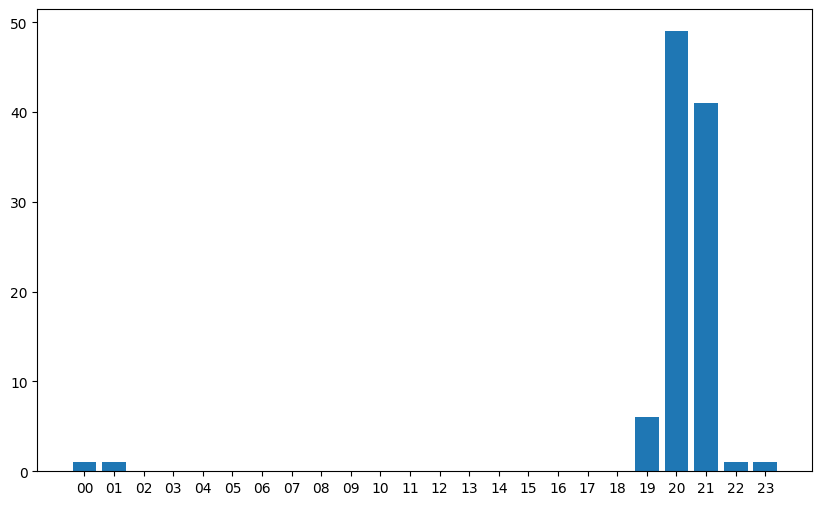

In [114]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x=list(time_dict.keys()),height=time_dict.values())

**Posts from 1-4 but mostly 3-4**

8 pm - (46) (39+5+1+1)
9 pm - (42) (37+2+2+1)  
In Between 8-9pm - 6 (2+1+1+1+1)
Past 9 - 2 (1+1)

01:36 pm - 1
11 pm - 1
7pm - 1
19m am


94 of last 100 videos posted from 8-9 pm

   



### Duration vs View Count

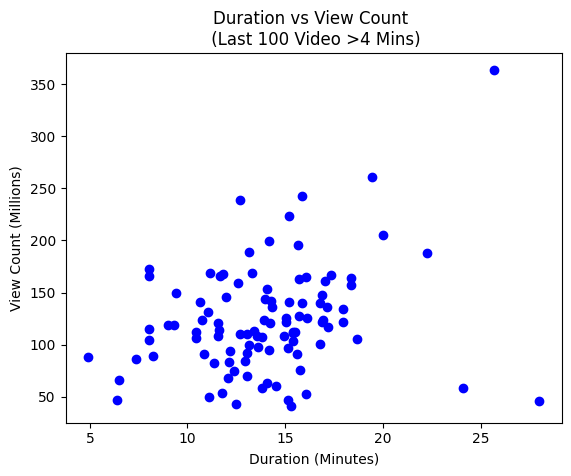

In [14]:
#plt.scatter(df['minutes'],df['viewCountMillions'],c=df['publishedAt'],cmap='RdYlGn')
plt.scatter(df['minutes'],df['viewCountMillions'],c='blue')

plt.xlabel('Duration (Minutes)')
plt.ylabel('View Count (Millions)')
plt.title('Duration vs View Count \n (Last 100 Video >4 Mins)')
plt.savefig('images/duration_vs_view_count.jpg')

### Testing last 20 videos

In [15]:
#test = df[(df['minutes']>15)&(df['minutes']<20)]
last_20 = df.sort_values(by='publishedAt')
last_20['last_20'] = [1]*20 + [0]*80
last_20 = last_20[last_20['last_20']==1]

### Seeing if last 20 videos show any changes being made

Text(0.5, 1.0, 'Duration vs View Count \n (Last 100 Video >4 Mins)')

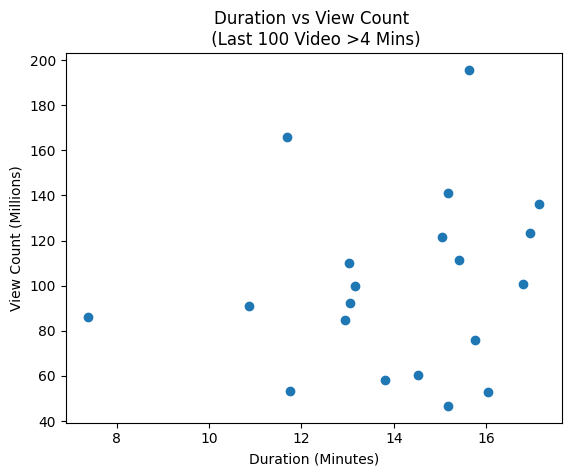

In [16]:
plt.scatter(last_20['minutes'],last_20['viewCountMillions'])
#plt.scatter(test['minutes'],test['viewCountMillions'],c='blue')

plt.xlabel('Duration (Minutes)')
plt.ylabel('View Count (Millions)')
plt.title('Duration vs View Count \n (Last 100 Video >4 Mins)')
#plt.savefig('images/duration_vs_view_count.jpg')

Can definitley see a tendency to go for longer videos

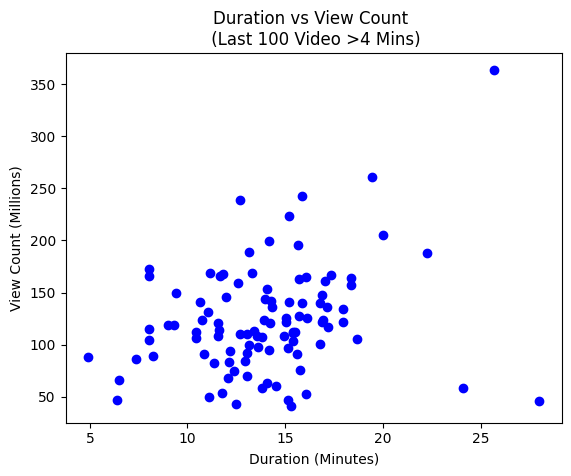

In [17]:
#plt.scatter(df['minutes'],df['viewCountMillions'],c=df['publishedAt'],cmap='RdYlGn')
plt.scatter(df['minutes'],df['viewCountMillions'],c='blue')

plt.xlabel('Duration (Minutes)')
plt.ylabel('View Count (Millions)')
plt.title('Duration vs View Count \n (Last 100 Video >4 Mins)')
plt.savefig('images/duration_vs_view_count.jpg')

### Box Plots to see if means go up

4-5 : 1
6-7 : 2
7-8 : 1
8-9 : 5
9-10 : 3
10-11 : 5
11-12 : 11
12-13 : 9
13-14 : 13
14-15 : 9
15-16 : 18
16-17 : 8
17-18 : 6
18-19 : 3
19-20 : 1
22-23 : 1
24-25 : 1
25-26 : 1


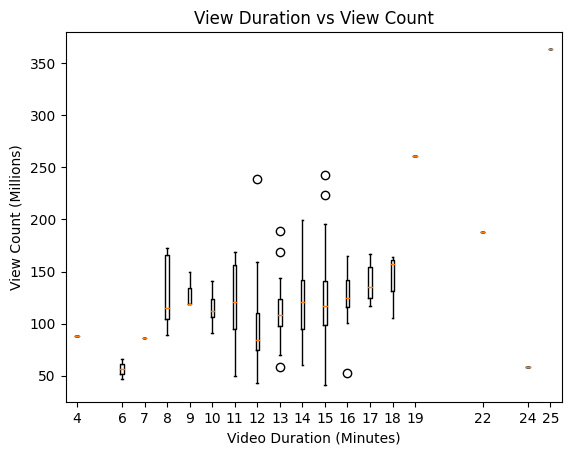

In [18]:
avg_count_time_duration = {}
fig = plt.figure()
ax = plt.subplot(111)
for a in range(3,30,1):
    curr_df = df[(df['minutes']>a)&(df['minutes']<(a+1))]
    if len(curr_df)!=0:
        print(f"{a}-{a+1} : {len(curr_df)}")
        ax.boxplot(curr_df['viewCountMillions'], positions = [a])
    #plt.boxplot(curr_df['viewCount'])
    #plt.show()
    #median_count
    #avg_count_time_duration[b] = avg_count
    # if avg_count>0:
    #     print(f"Between {a} and {b} minutes : {avg_count}")
ax.set_title('View Duration vs View Count')
ax.set_xlabel('Video Duration (Minutes)')
ax.set_ylabel('View Count (Millions)')
plt.savefig('images\\boxplot_view_times.jpg')

### Average View Count per grouping of videos
Videos grouped by how many minutes (rounded) they are

Text(0, 0.5, 'View Count (Millions)')

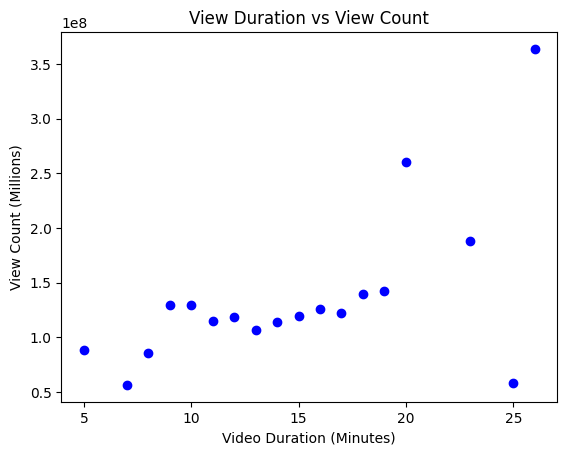

In [19]:
avg_count_time_duration = {}
fig = plt.figure()
ax = plt.subplot(111)
for a in range(3,30,1):
    curr_mean = df[(df['minutes']>a)&(df['minutes']<(a+1))]['viewCount'].mean()
    ax.scatter(a+1,curr_mean,color='blue')
ax.set_title('View Duration vs View Count')
ax.set_xlabel('Video Duration (Minutes)')
ax.set_ylabel('View Count (Millions)')

In [20]:
df.minutes.min()

4.916666666666667

### Graph to show how APV depends on Length

C:\Users\fligo\AppData\Local\Temp\ipykernel_15884\132161829.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bD" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x,y,'-bD',markevery=markers_on, color='blue')


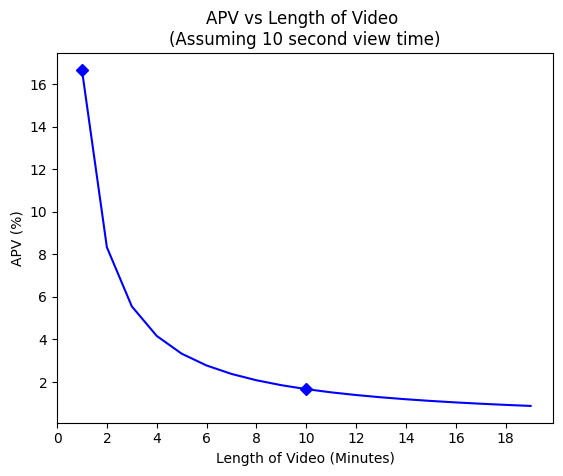

In [21]:
x = list(range(1,20,1))
y = [(0.16666667/x)*100 for x in x]
markers_on = [0,9]
plt.plot(x,y,'-bD',markevery=markers_on, color='blue')
plt.title('APV vs Length of Video \n(Assuming 10 second view time)')
plt.ylabel('APV (%)')
plt.xlabel('Length of Video (Minutes)')
plt.xticks(range(0,20,2));

## View Count vs Likes

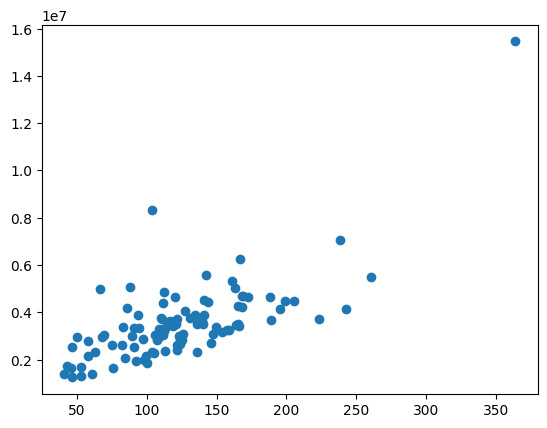

In [22]:
plt.scatter(df['viewCountMillions'],df['likeCount'])

In [26]:
last_100 = df.sort_values(by='publishedAt').iloc[:,0:100]

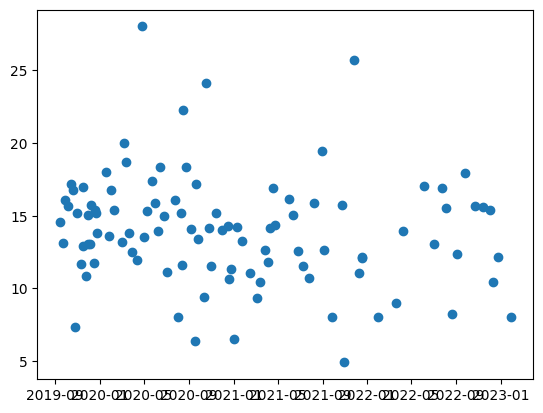

In [28]:
plt.scatter(last_100['publishedAt'],last_100['minutes'])

In [31]:
last_100['minutes'].describe()

count    100.000000
mean      13.989500
std        3.803820
min        4.916667
25%       11.733333
50%       14.016667
75%       15.787500
max       28.000000
Name: minutes, dtype: float64

In [54]:
print(last_100['minutes'].sort_values().iloc[9])
print(last_100['minutes'].sort_values().iloc[89])
#print(last_100['minutes'].sort_values())
print(len(last_100[(last_100['minutes']>11)&(last_100['minutes']<16)]))


9.016666666666667
17.95
60


60 of last 100 videos were in between 11 and 16 minutes

## 

In [57]:
last_100['I_is_first_in_title'].value_counts()

0    56
1    44
Name: I_is_first_in_title, dtype: int64

In [59]:
last_100['money_in_title'].value_counts()

0    53
1    47
Name: money_in_title, dtype: int64

In [60]:
last_100

,id,title,publishedAt,duration,viewCount,likeCount,commentCount,seconds,minutes,hours,I_is_first_in_title,money_in_title,minutes_round,longer_than_5_mins,longer_than_10_mins,longer_than_15_mins,longer_than_20_mins,viewCountMillions,publishedAtTime
81,NS3hse9ezik,"Last To Leave Ramen Noodle Pool Wins $20,000",2019-09-13 20:00:05+00:00,PT14M32S,60577598,1376289,44670,872,14.533333,0.242222,0,1,15.0,1,1,0,0,60.577598,20:00
82,d1010B3sKNQ,Surviving 24 Hours Straight In A Rain Forest,2019-09-21 21:00:00+00:00,PT13M9S,99735248,2139932,72574,789,13.150000,0.219167,0,0,13.0,1,1,0,0,99.735248,21:00
83,al6130OD1Ck,"Donating $100,000 To Random Streamers",2019-09-28 20:29:58+00:00,PT16M3S,52691524,1663040,44174,963,16.050000,0.267500,0,1,16.0,1,1,1,0,52.691524,20:29
84,QxGVgXf_LNk,"Going Through The Same Drive Thru 1,000 Times",2019-10-05 20:00:08+00:00,PT15M38S,195622009,4124916,130590,938,15.633333,0.260556,0,0,16.0,1,1,1,0,195.622009,20:00
85,anFxsa5jXrE,"I Searched 100 Dumpsters, Here's What I Found",2019-10-12 20:10:01+00:00,PT17M9S,136296294,2328944,56428,1029,17.150000,0.285833,1,0,17.0,1,1,1,0,136.296294,20:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,kX3nB4PpJko,"Last To Take Hand Off Jet, Keeps It!",2022-11-12 21:00:00+00:00,PT15M37S,90835505,3328644,104899,937,15.616667,0.260278,0,0,16.0,1,1,1,0,90.835505,21:00
172,0CTp1a-aCUM,"100 Kids Vs 100 Adults For $500,000",2022-12-03 21:00:00+00:00,PT15M23S,112471275,3187307,93260,923,15.383333,0.256389,0,1,15.0,1,1,1,0,112.471275,21:00
173,h5NvTTOlOtI,Hydraulic Press Vs Lamborghini,2022-12-10 21:00:01+00:00,PT10M25S,111706959,4405020,126673,625,10.416667,0.173611,0,0,10.0,1,1,0,0,111.706959,21:00
174,7IKab3HcfFk,I Survived 50 Hours In Antarctica,2022-12-24 20:59:59+00:00,PT12M10S,93756727,3903088,149139,730,12.166667,0.202778,1,0,12.0,1,1,0,0,93.756727,20:59


# Model Building for Feature Importance
This may give us an idea of what correlates most with a higher view count.

In [123]:
!pip install scikit-learn

     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
     ---- ----------------------------------- 1.0/8.4 MB 21.1 MB/s eta 0:00:01
     ----------- ---------------------------- 2.4/8.4 MB 25.9 MB/s eta 0:00:01
     ------------------ --------------------- 3.8/8.4 MB 26.9 MB/s eta 0:00:01
     ------------------------- -------------- 5.4/8.4 MB 28.8 MB/s eta 0:00:01
     ------------------------------- -------- 6.7/8.4 MB 28.4 MB/s eta 0:00:01
     -------------------------------------- - 8.0/8.4 MB 28.5 MB/s eta 0:00:01
     ---------------------------------------  8.4/8.4 MB 28.2 MB/s eta 0:00:01
     ---------------------------------------- 8.4/8.4 MB 25.5 MB/s eta 0:00:00
  Using cached scipy-1.10.0-cp39-cp39-win_amd64.whl (42.5 MB)
     ---------------------------------------- 0.0/298.0 kB ? eta -:--:--
     ------------------------------------- 298.0/298.0 kB 19.2 MB/s eta 0:00:00


In [125]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = df[['seconds','I_is_first_in_title','money_in_title','longer_than_5_mins','longer_than_10_mins','longer_than_15_mins','longer_than_20_mins']]
# y = 1 * x_0 + 2 * x_1 + 3
y = df['viewCount']
reg = LinearRegression().fit(X, y)
reg.score(X, y)

reg.coef_

reg.intercept_


39010601.47203399

In [127]:
for a,b in zip(X,reg.coef_):
    print(a,b)

seconds 114013.7957163726
I_is_first_in_title 15381605.791636288
money_in_title 2996356.7995613012
longer_than_5_mins 11597515.796614412
longer_than_10_mins -32473690.2877758
longer_than_15_mins -3087641.1242611706
longer_than_20_mins -25204406.026447743
